In [1]:
!pip install git+https://github.com/macrosynergy/macrosynergy@develop

  Cloning https://github.com/macrosynergy/macrosynergy (to revision develop) to /private/var/folders/vx/crpb19sx36gc0mgn_x79dpzr0000gn/T/pip-req-build-bqv2gc74
  Running command git clone --filter=blob:none --quiet https://github.com/macrosynergy/macrosynergy /private/var/folders/vx/crpb19sx36gc0mgn_x79dpzr0000gn/T/pip-req-build-bqv2gc74
  Resolved https://github.com/macrosynergy/macrosynergy to commit 3221421709de07369fd2f1b16b48eea720b2b5ca
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for macrosynergy: filename=macrosynergy-0.0.51.dev0+20231205215153.3221421-py3-none-any.whl size=217366 sha256=33db0db04d5b913a01b16ebe6d40e57594680fa197c78326ac65f6302e86be1a
  Stored in directory: /private/var/folders/vx/crpb19sx36gc0mgn_x79dpzr0000gn/T/pip-ephem-wheel-cache-if4k0ftj/wheels/ba/80/e9/85dfe5d540f3181e471f154d49c7926f4e6b57ce2d481cb5e0
Successfully built macrosynergy
  Attempting uni

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


import macrosynergy.management as msm
import macrosynergy.panel as msp
import macrosynergy.signal as mss
import macrosynergy.pnl as msn


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

warnings.simplefilter("ignore")

In [3]:
# Cross-sections of interest

cids_dm = ["AUD", "CAD", "CHF", "EUR", "GBP", "JPY", "NOK", "NZD", "SEK", "USD"]
cids_em = [
    "CLP",
    "COP",
    "CZK",
    "HUF",
    "IDR",
    "ILS",
    "INR",
    "KRW",
    "MXN",
    "PLN",
    "THB",
    "TRY",
    "TWD",
    "ZAR",
]
cids = cids_dm + cids_em
cids_du = cids_dm + cids_em
cids_dux = list(set(cids_du) - set(["IDR", "NZD"]))
cids_xg2 = list(set(cids_dux) - set(["EUR", "USD"]))

In [4]:
# Quantamental categories of interest

ecos = [
    "CPIC_SA_P1M1ML12",
    "CPIC_SJA_P3M3ML3AR",
    "CPIC_SJA_P6M6ML6AR",
    "CPIH_SA_P1M1ML12",
    "CPIH_SJA_P3M3ML3AR",
    "CPIH_SJA_P6M6ML6AR",
    "INFTEFF_NSA",
    "INTRGDP_NSA_P1M1ML12_3MMA",
    "INTRGDPv5Y_NSA_P1M1ML12_3MMA",
    "PCREDITGDP_SJA_D1M1ML12",
    "PCREDITBN_SJA_P1M1ML12",
    "RGDP_SA_P1Q1QL4_20QMA",
    "RYLDIRS02Y_NSA",
    "RYLDIRS05Y_NSA",
]
mkts = [
    "DU02YXR_NSA",
    "DU05YXR_NSA",
    "DU02YXR_VT10",
    "DU05YXR_VT10",
    "EQXR_NSA",
    "EQXR_VT10",
    "FXXR_NSA",
    "FXXR_VT10",
    "FXCRR_NSA",
    "FXTARGETED_NSA",
    "FXUNTRADABLE_NSA",
]

xcats = ecos + mkts

In [5]:
# load the dataset:

df = pd.read_csv('JPMaQS_Quantamental_Indicators.csv', index_col=0, parse_dates=['real_date'])

scols = ["cid", "xcat", "real_date", "value"]  # required columns
df = df[scols].copy()
display (df.tail(3))
df.info()

,cid,xcat,real_date,value
3350268,ZAR,RGDP_SA_P1Q1QL4_20QMA,2023-08-31,0.534737
3350269,ZAR,RYLDIRS02Y_NSA,2023-08-31,3.230619
3350270,ZAR,RYLDIRS05Y_NSA,2023-08-31,3.543863


<class 'pandas.core.frame.DataFrame'>
Index: 3350271 entries, 0 to 3350270
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   cid        object        
 1   xcat       object        
 2   real_date  datetime64[ns]
 3   value      float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 127.8+ MB


In [6]:
display(df['xcat'].unique())
display(df['cid'].unique())
df['ticker'] = df['cid'] + "_" + df["xcat"]
df.set_index('real_date', inplace=True)
df.sort_index(inplace=True)

array(['CPIC_SA_P1M1ML12', 'CPIC_SJA_P3M3ML3AR', 'CPIC_SJA_P6M6ML6AR',
       'CPIH_SA_P1M1ML12', 'CPIH_SJA_P3M3ML3AR', 'CPIH_SJA_P6M6ML6AR',
       'FXTARGETED_NSA', 'FXUNTRADABLE_NSA', 'FXXR_NSA', 'FXXR_VT10',
       'INFTEFF_NSA', 'INTRGDP_NSA_P1M1ML12_3MMA',
       'INTRGDPv5Y_NSA_P1M1ML12_3MMA', 'PCREDITBN_SJA_P1M1ML12',
       'PCREDITGDP_SJA_D1M1ML12', 'RGDP_SA_P1Q1QL4_20QMA',
       'RYLDIRS02Y_NSA', 'RYLDIRS05Y_NSA', 'DU02YXR_NSA', 'DU02YXR_VT10',
       'DU05YXR_NSA', 'DU05YXR_VT10', 'EQXR_NSA', 'EQXR_VT10',
       'FXCRR_NSA'], dtype=object)

array(['AUD', 'CAD', 'CHF', 'CLP', 'COP', 'CZK', 'EUR', 'GBP', 'HUF',
       'IDR', 'ILS', 'INR', 'JPY', 'KRW', 'MXN', 'NOK', 'NZD', 'PLN',
       'SEK', 'THB', 'TRY', 'TWD', 'USD', 'ZAR'], dtype=object)

In [7]:
# LSTM particular implementations

from sklearn.model_selection import TimeSeriesSplit
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras_tuner import RandomSearch
from keras.metrics import mean_squared_error

# only consider the USD dollars for now
# only did USD for now, can be extended to other currencies
df_USD = df[df["cid"] == 'USD'] 

# make the xcat features into columns
df_USD = df_USD.pivot_table(index='real_date', columns='xcat', values='value', aggfunc='first')

df_USD = df_USD.reset_index()

# deals with missing data
df_USD = df_USD.dropna()

# split into training and test data
tss = TimeSeriesSplit(n_splits = 4)

for train_index, test_index in tss.split(df_USD):
    pass

train_set = df_USD.iloc[train_index]
test_set = df_USD.iloc[test_index]

tss = TimeSeriesSplit(n_splits = 3)

for train_index, test_index in tss.split(train_set):
    pass

development_set = train_set.iloc[train_index]
val_set = df_USD.iloc[test_index]




In [8]:
dev_y = np.array(development_set['DU05YXR_VT10'])
dev_y = dev_y.reshape(dev_y.shape[0],1)

dev_X = np.array(development_set.drop(columns=['DU05YXR_VT10', 'real_date']))
dev_X = dev_X.reshape(dev_X.shape[0],dev_X.shape[1],1)

test_y = np.array(test_set['DU05YXR_VT10'])
test_y = test_y.reshape(test_y.shape[0],1)

test_X = np.array(test_set.drop(columns=['DU05YXR_VT10','real_date']))
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

val_y = np.array(val_set['DU05YXR_VT10'])
val_y = val_y.reshape(val_set.shape[0],1)

val_X = np.array(val_set.drop(columns=['DU05YXR_VT10','real_date']))
val_X = val_X.reshape(val_X.shape[0],val_X.shape[1],1)

In [9]:
# Hyperparameter training part

def build_model(hp):
  model = Sequential()

  model = Sequential()

  model.add(LSTM(hp.Choice('units', [64, 128, 256]), activation='relu', input_shape=(dev_X.shape[1], 1), return_sequences=True))
  model.add(LSTM(hp.Choice('units', [8, 16, 32]), activation='relu', return_sequences=False))
  model.add(Dense(1))
  model.compile(hp.Choice('optimizer', ["adam", "RMSProp", "SGD"]),loss='mse', metrics=[mean_squared_error])
  return model

In [10]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [11]:
tuner.search(dev_X, dev_y, epochs=10, validation_data=(val_X, val_y))
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 26s]
val_loss: 0.15687018632888794

Best val_loss So Far: 0.13124750554561615
Total elapsed time: 00h 02m 51s


In [12]:
# Retrain on the optimal hyperparameter and evaluate on the test set

history = best_model.fit(dev_X, dev_y, epochs=10, validation_data=(val_X, val_y))
records = best_model.evaluate(test_X, test_y)
results = best_model.predict(test_X)

Epoch 1/10
116/116 [==============================] - 6s 50ms/step - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.1680 - val_mean_squared_error: 0.1680
Epoch 2/10
116/116 [==============================] - 6s 54ms/step - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 3/10
116/116 [==============================] - 6s 54ms/step - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.1082 - val_mean_squared_error: 0.1082
Epoch 4/10
116/116 [==============================] - 6s 51ms/step - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 5/10
116/116 [==============================] - 6s 53ms/step - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.1148 - val_mean_squared_error: 0.1148
Epoch 6/10
116/116 [==============================] - 6s 53ms/step - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 7/10
116/116 [==

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("The following are the results of my best model on the test set")
print("---------------------------------------------------------------")
print("The mean square error is " + str(records[1]))
print("The r2 score is: " + str(r2_score(test_y, results)))
print("The mean absolute error is: " + str(mean_absolute_error(test_y, results)))

The following are the results of my best model on the test set
---------------------------------------------------------------
The mean square error is 0.15913094580173492
The r2 score is: 0.7146414690964394
The mean absolute error is: 0.2625401886576063


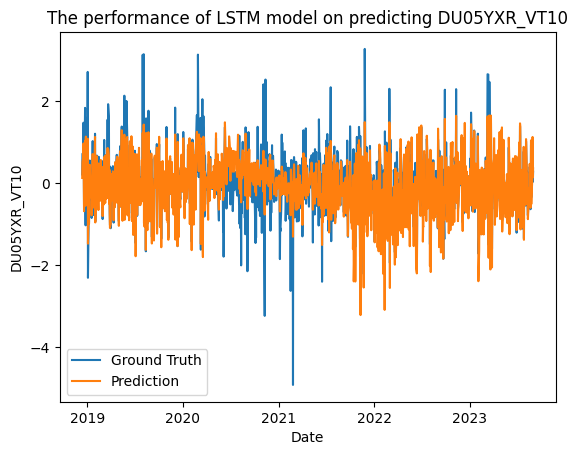

In [24]:
plt.title("The performance of LSTM model on predicting DU05YXR_VT10")
plt.plot(test_set['real_date'], test_set['DU05YXR_VT10'])
plt.plot(test_set['real_date'], results)
plt.legend(['Ground Truth', 'Prediction'])
plt.xlabel('Date')
plt.ylabel('DU05YXR_VT10')
plt.show()